<a href="https://colab.research.google.com/github/varsharao2005/PROFILE/blob/main/htwtpro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


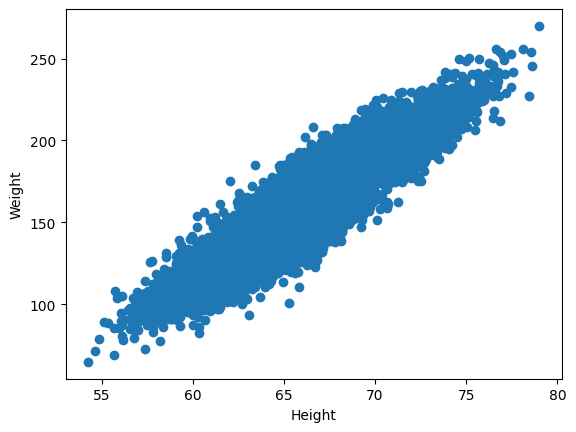

In [4]:
## scatter plot
plt.xlabel("Height")
plt.ylabel("Weight")
plt.scatter(df['Height'],df['Weight'])

In [5]:
## correlation
df.corr()

<ipython-input-5-5b262cdd1d46>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


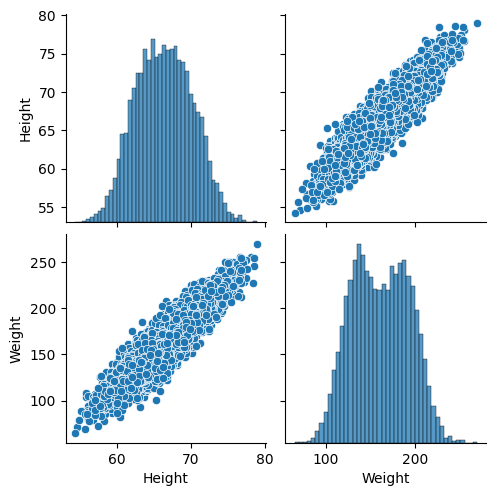

In [6]:
import seaborn as sns
sns.pairplot(df)

In [14]:
## independent and dependent features
## independent features should always be in dataframe or 2d array
## here y can be 1d also, cuz only 1 dependent feature is there
x=df[['Height']]
y=df['Weight']
np.array(x).shape
np.array(y).shape

(10000,)

In [18]:
## train test split = to check overfitting and underfittng
## train dataset only to train the model
## test dataset to check how the model is predicting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [22]:
## standardization
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
scaler.fit_transform(x_train)

array([[-0.53914706],
       [ 1.71113721],
       [ 0.00898355],
       ...,
       [-0.52641877],
       [ 0.7094092 ],
       [ 0.32280629]])

In [25]:
x_test-scaler.transform(x_test)
x_test

,Height
6252,68.687232
4684,68.829334
1731,66.398128
4742,71.929340
4521,67.042903
...,...
4862,70.534667
7025,65.873106
7647,60.646988
7161,67.122422


In [28]:
## applying linear regression
from sklearn.linear_model import LinearRegression

In [32]:
regressions=LinearRegression(n_jobs=-1)

In [34]:
regressions.fit(x_train,y_train)

LinearRegression(n_jobs=-1)

In [37]:
print("Coefficient or slope: ",regressions.coef_)
print("Intercept: ",regressions.intercept_)


Coefficient or slope:  [7.70228296]
Intercept:  -349.80298809620797


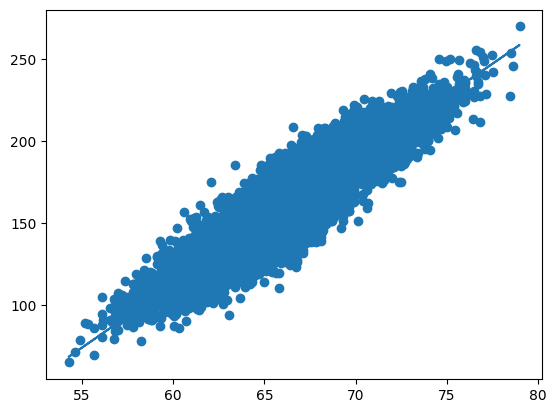

In [39]:
## plot best fit line
plt.scatter(x_train,y_train)
plt.plot(x_train,regressions.predict(x_train))

### prediction for test data
1. predicted height output = intercept + coef_(height)
2. y_pred_test=65.4364 + 1.26(x_test)

In [44]:
## prediction for test data
y_pred=regressions.predict(x_test)

In [45]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


149.31479307438
9.720990891992406
12.21944323913246


In [49]:
from sklearn.metrics import r2_score

In [50]:
score=r2_score(y_test, y_pred)
print(score)

0.8573532043041168


In [53]:
adjusted_r2=1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print(adjusted_r2)

0.8572960999023169


In [59]:
regressions.predict(scaler.transform([[72]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-338.47525849])